### Moving Average

In [1]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt

#### Connect mysql

In [2]:
conn = pymysql.connect(
    host='192.168.100.120',
    port=16033,
    user='root',
    password='its@1234',
    db='UYeG_Cloud',
    charset='utf8'
)

curs = conn.cursor()

set_day1 = '2019-08-01'
set_day2 = '2019-10-25'



sql_peak = "SELECT DataSavedTime, Value FROM HisAvgHour \
    WHERE DefColumn = 'Item005' AND DefTable = 'HisItemCurr' AND DataSavedTime \
    BETWEEN '"+set_day1+"' and '"+set_day2+"' ORDER BY DataSavedTime ASC"
print(sql_peak)
curs.execute(sql_peak)
rows_peak=curs.fetchall()


data_peak = list(rows_peak)
df_peak = pd.DataFrame(data_peak)

df_peak.columns = ['DataSavedTime', 'Value']

print(df_peak)
print(len(df_peak))
conn.close()
print(df_peak['Value'].isna().sum())
print(df_peak.tail())

SELECT DataSavedTime, Value FROM HisAvgHour     WHERE DefColumn = 'Item005' AND DefTable = 'HisItemCurr' AND DataSavedTime     BETWEEN '2019-08-01' and '2019-10-25' ORDER BY DataSavedTime ASC
          DataSavedTime   Value
0   2019-08-27 12:00:00  30.837
1   2019-08-27 13:00:00  32.794
2   2019-08-27 14:00:00  26.179
3   2019-08-27 15:00:00  32.500
4   2019-08-27 16:00:00  31.502
..                  ...     ...
901 2019-10-24 20:00:00  32.251
902 2019-10-24 21:00:00  32.050
903 2019-10-24 22:00:00  31.139
904 2019-10-24 23:00:00  29.576
905 2019-10-25 00:00:00  29.025

[906 rows x 2 columns]
906
0
          DataSavedTime   Value
901 2019-10-24 20:00:00  32.251
902 2019-10-24 21:00:00  32.050
903 2019-10-24 22:00:00  31.139
904 2019-10-24 23:00:00  29.576
905 2019-10-25 00:00:00  29.025


In [3]:
ma12 = df_peak['Value'].rolling(window=12).mean()
ma24 = df_peak['Value'].rolling(window=24).mean()
ma120 = df_peak['Value'].rolling(window=120).mean()
ma720 = df_peak['Value'].rolling(window=720).mean()
print(ma12.tail())
print(ma24.tail())
print(ma120.tail())
print(ma720.tail())


901    34.110500
902    33.967167
903    33.577667
904    33.161167
905    32.763583
Name: Value, dtype: float64
901    33.644542
902    33.560292
903    33.416750
904    33.223042
905    33.047542
Name: Value, dtype: float64
901    33.058483
902    33.046367
903    33.026733
904    32.988567
905    32.945833
Name: Value, dtype: float64
901    33.168722
902    33.166343
903    33.163776
904    33.158700
905    33.152571
Name: Value, dtype: float64


In [4]:
new_df_peak = df_peak
new_df_peak.insert(len(df_peak.columns), "MA12", ma12)
new_df_peak.insert(len(new_df_peak.columns), "MA24", ma24)
new_df_peak.insert(len(new_df_peak.columns), "MA120", ma120)
new_df_peak.insert(len(new_df_peak.columns), "MA720", ma720)
print(new_df_peak.tail(5))

          DataSavedTime   Value       MA12       MA24      MA120      MA720
901 2019-10-24 20:00:00  32.251  34.110500  33.644542  33.058483  33.168722
902 2019-10-24 21:00:00  32.050  33.967167  33.560292  33.046367  33.166343
903 2019-10-24 22:00:00  31.139  33.577667  33.416750  33.026733  33.163776
904 2019-10-24 23:00:00  29.576  33.161167  33.223042  32.988567  33.158700
905 2019-10-25 00:00:00  29.025  32.763583  33.047542  32.945833  33.152571


#### Plot!

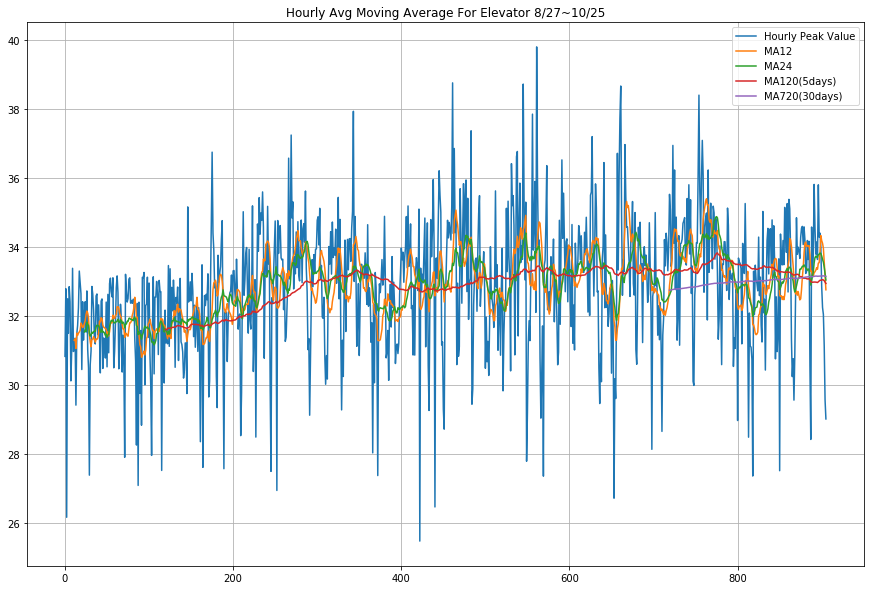

In [7]:
plt.figure(figsize=(15,10))
plt.plot(new_df_peak.index, new_df_peak['Value'], label="Hourly Peak Value")
plt.plot(new_df_peak.index, new_df_peak['MA12'], label="MA12")
plt.plot(new_df_peak.index, new_df_peak['MA24'], label="MA24")
plt.plot(new_df_peak.index, new_df_peak['MA120'], label="MA120(5days)")
plt.plot(new_df_peak.index, new_df_peak['MA720'], label="MA720(30days)")
plt.legend(loc='best')
plt.title("Hourly Avg Moving Average For Elevator 8/27~10/25")
plt.grid()
plt.show()

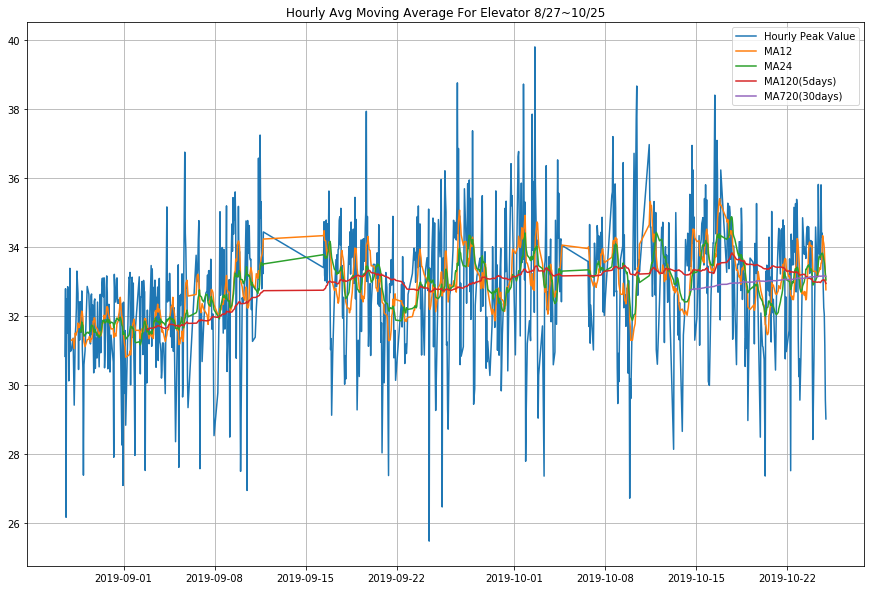

In [8]:
plt.figure(figsize=(15,10))
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['Value'], label="Hourly Peak Value")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA12'], label="MA12")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA24'], label="MA24")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA120'], label="MA120(5days)")
plt.plot(new_df_peak['DataSavedTime'], new_df_peak['MA720'], label="MA720(30days)")
plt.legend(loc='best')
plt.title("Hourly Avg Moving Average For Elevator 8/27~10/25")
plt.grid()
plt.show()